The Sparks Foundation

Task 1 - Data Science and Business Analytics

Dataset Link : http://bit.ly/w-data



**Hasti Shah**

Explore Supervised Machine Learning

Goal- Predict the percentage of an student based on the no. of study hours

**Importing the libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importing the dataset**


In [ ]:
dataset=pd.read_csv('/content/Task1.csv')
dataset.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**More Information regarding the data**


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Creating features and labels**

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

**Picturing the data**

In [ ]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Plotting the dataset**

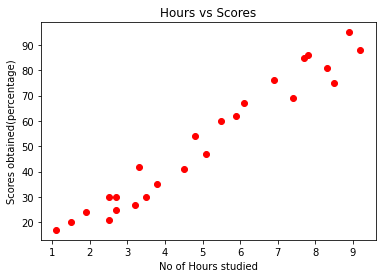

In [ ]:
plt.scatter(X,y,marker = 'o', color='red')
plt.title("Hours vs Scores")
plt.xlabel('No of Hours studied')
plt.ylabel('Scores obtained(percentage)')
plt.show()

**Splitting the dataset into training and test set**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

**Training the simple linear regression model on the training set**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the test results**

In [ ]:
y_pred=regressor.predict(X_test)
print('Predicted values: ', y_pred)

Predicted values:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**Obtaining the regression line**

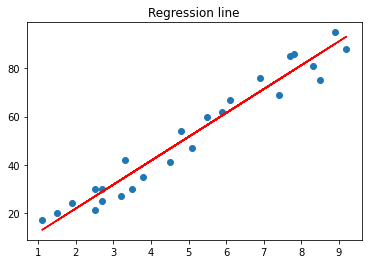

In [ ]:
#plottong the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y,marker='o')
plt.title('Regression line')
plt.plot(X, line,color='red');
plt.show()

**Dataframe for actual and predicted labels**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualising actual and predicted values**

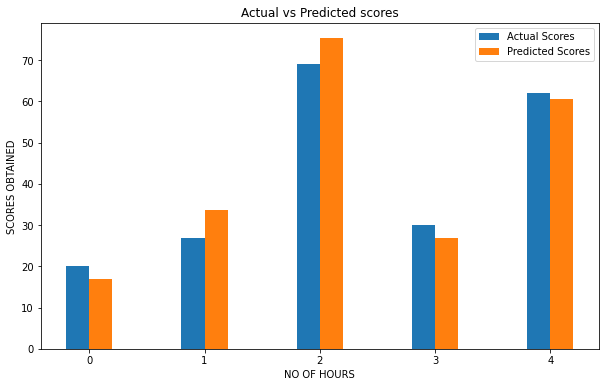

In [ ]:
N = len(df)
orange_bar = y_test
green_bar = y_pred
ind = np.arange(N)
plt.figure(figsize=(10,6))
width = 0.2

plt.bar(ind, orange_bar, width,label='Actual Scores')
plt.bar(ind+width, green_bar, width, label='Predicted Scores')
plt.xlabel('NO OF HOURS')
plt.ylabel('SCORES OBTAINED')
plt.title('Actual vs Predicted scores')
plt.xticks(ind+width/2,np.arange(0,8))

plt.legend(loc='best')
plt.show()

**Predicting the required output by studying the input data (What will be predicted score if a student studies for 9.25 hrs/ day?)**

In [ ]:
hours = 9.25
output = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score(in precentage) = {}".format(output[0]))

No of Hours = 9.25
Predicted Score(in precentage) = 93.69173248737539


**Calculating mean absolute error**

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2score = metrics.r2_score(y_test,y_pred)

print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("Root mean squared error: ",rmse)
print("R2score: ",r2score)

Mean squared error:  21.598769307217456
Mean absolute error:  4.183859899002982
Root mean squared error:  4.647447612100373
R2score:  0.9454906892105354
